In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
## training model

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/opt/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.8692 - loss: 0.4662 - val_accuracy: 0.9574 - val_loss: 0.1501
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.9649 - loss: 0.1184 - val_accuracy: 0.9653 - val_loss: 0.1152
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.9746 - loss: 0.0803 - val_accuracy: 0.9706 - val_loss: 0.0983
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.9836 - loss: 0.0536 - val_accuracy: 0.9685 - val_loss: 0.1067
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.9869 - loss: 0.0426 - val_accuracy: 0.9727 - val_loss: 0.0958
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.9886 - loss: 0.0361 - val_accuracy: 0.9725 - val_loss: 0.1012
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.9890 - loss: 0.0327 - val_accuracy: 0.9720 - val_loss: 0.1082
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.9922 -

In [8]:
history.history

{'accuracy': [0.9240000247955322,
  0.9657291769981384,
  0.9752708077430725,
  0.9811875224113464,
  0.9848124980926514,
  0.9882708191871643,
  0.989145815372467,
  0.9915000200271606,
  0.9928541779518127,
  0.9928749799728394,
  0.9956874847412109,
  0.9943749904632568,
  0.9943958520889282,
  0.9962708353996277,
  0.9957916736602783,
  0.995187520980835,
  0.9977916479110718,
  0.996749997138977,
  0.9956250190734863,
  0.9971041679382324,
  0.9961041808128357,
  0.9980000257492065,
  0.9968541860580444,
  0.9979375004768372,
  0.9966041445732117,
  0.997083306312561,
  0.9973124861717224,
  0.9979791641235352,
  0.9977291822433472,
  0.997041642665863],
 'loss': [0.2650790512561798,
  0.1140579953789711,
  0.0779823586344719,
  0.06035776436328888,
  0.046533986926078796,
  0.03619653731584549,
  0.032505620270967484,
  0.02496507205069065,
  0.021688414737582207,
  0.020987726747989655,
  0.014187864027917385,
  0.016530875116586685,
  0.01614808849990368,
  0.011599261313676834

In [9]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step


In [10]:
y_pred = y_prob.argmax(axis=1)

In [11]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [12]:
accuracy_score(y_test,y_pred)

0.9724

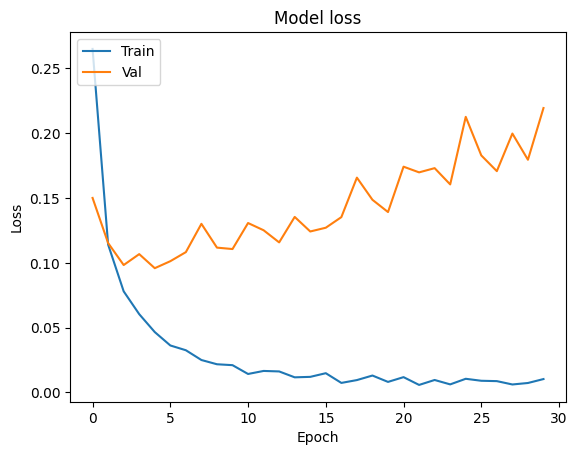

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

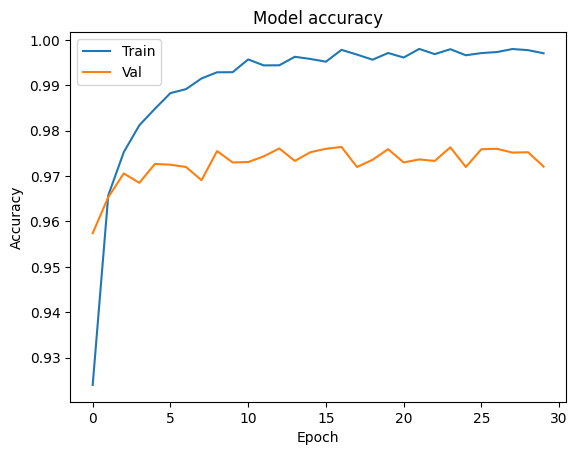

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

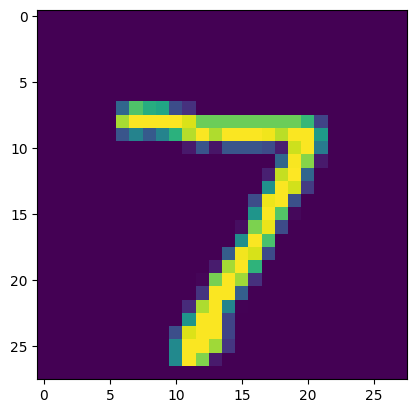

In [15]:
plt.imshow(X_test[0])

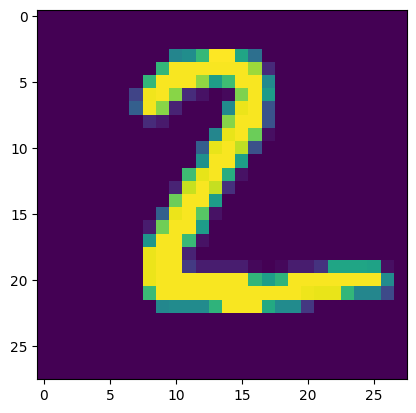

In [16]:
plt.imshow(X_test[1])

In [17]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

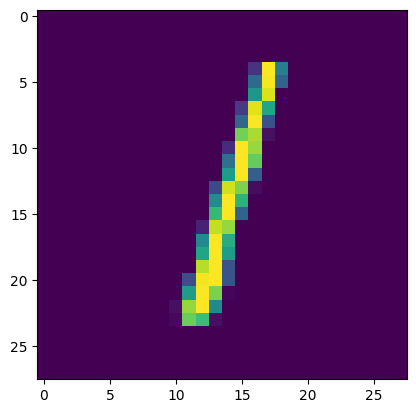

In [24]:
plt.imshow(X_test[2])